## Plotting in Python

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures and for visualizing data. 
Some of the many advantages of this library includes:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib 
highly suitable for generating figures for scientific publications is that all aspects of the figure can be 
controlled *programmatically*. This is important for reproducibility, convenient when one needs to regenerate 
the figure with updated data or changes its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

To get started using Matplotlib in a Python program, either include the symbols from the `pylab` module (the easy way):

In [1]:
from pylab import *

or import the 'matplotlib.pyplot' module under the name 'plt' (the tidy way):

In [2]:
import matplotlib.pyplot as plt

If you are ever having problems seeing your figures inside of your iPython notebooks, or your figures pop up as separate windows, you should
add the following so called iPython magic command, to tell iPython to draw all figures inside (inline) of your iPython notebook:

In [3]:
%matplotlib inline

# API

The easiest way to get started with plotting using matplotlib is often to use the API provided by matplotlib. 

To use this API from matplotlib, we need to include the symbols in the `pylab` module: 

In [4]:
from pylab import *

### Example

We have already seen some examples of a function of one variable, and using Python functions to represent
and visualize the function over a range of values.  For example, a simple figure of

$f(x) = x^2$

In [5]:
x = linspace(-5, 5, 30)
y = x ** 2

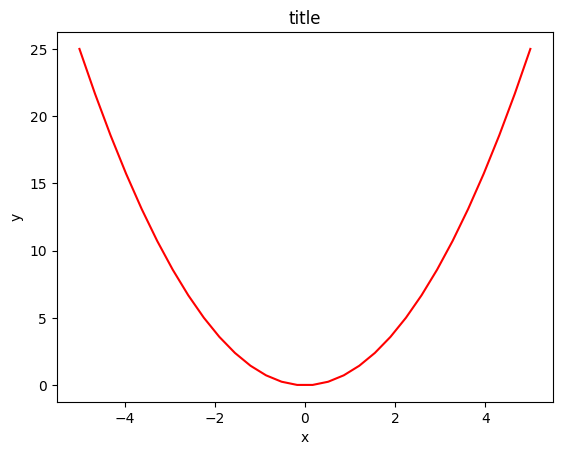

In [6]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()

# The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the non OO API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`.

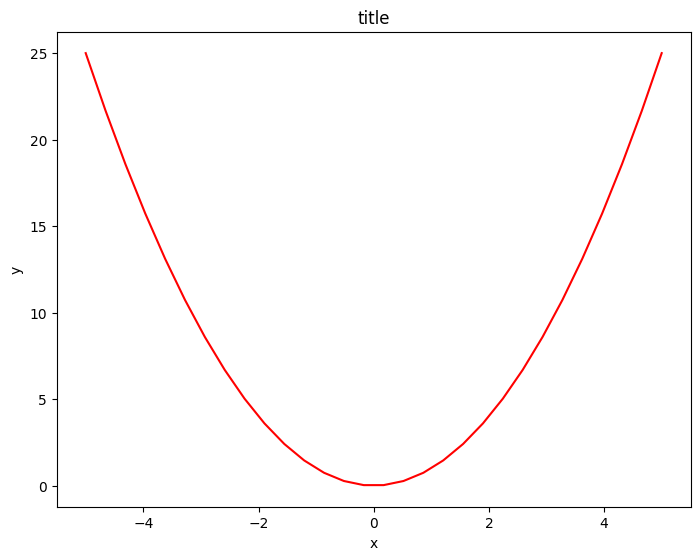

In [7]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.99, 0.99]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are place, and we can easily add more than one axis to the figure.

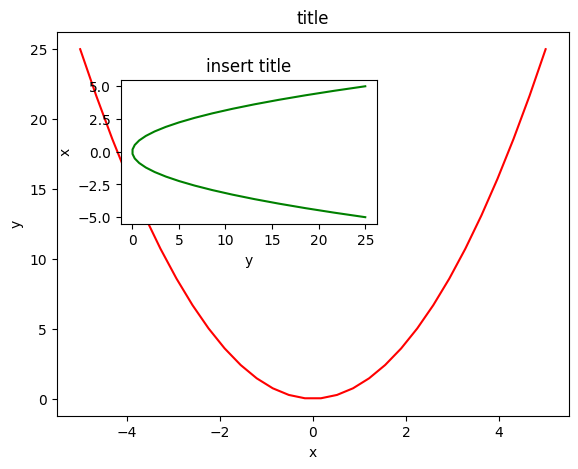

In [8]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

If we don't care to be explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

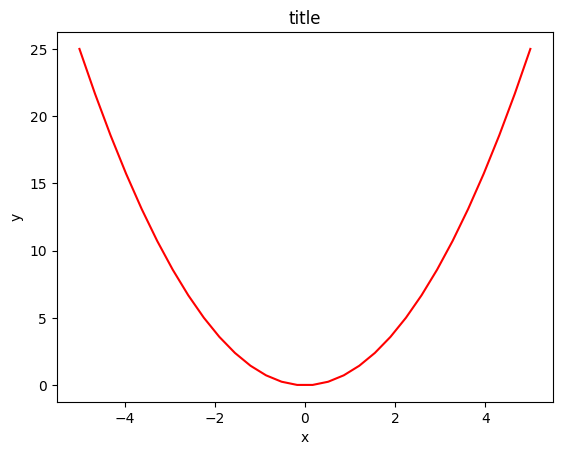

In [9]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

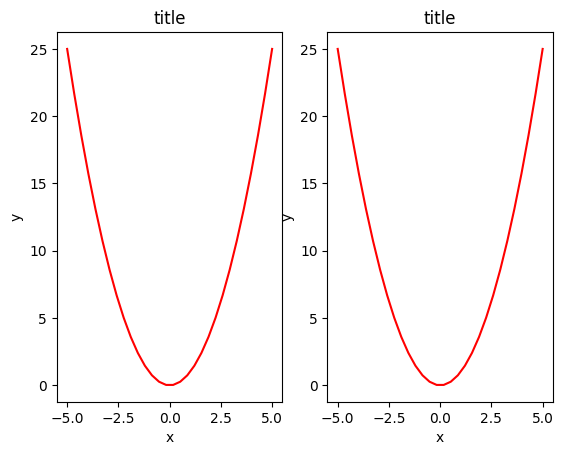

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title');

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

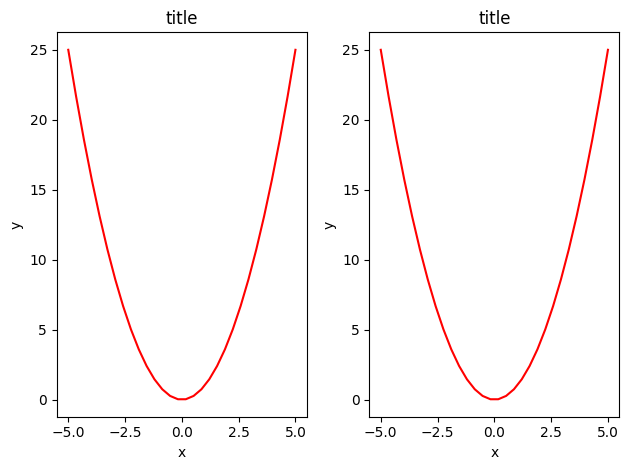

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

## Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple with width and height of the figure in inches, and `dpi` is the dot-per-inch (pixel per inch). To create a figure with size 800 by 400 pixels we can do: 

In [12]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function.

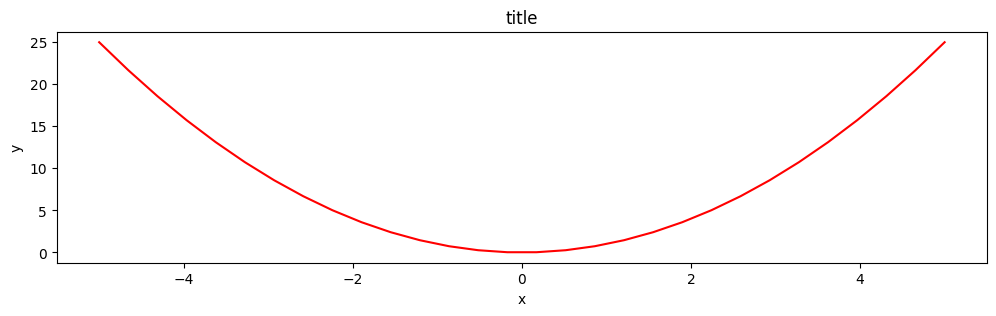

In [13]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures

To save a figure a file we can use the `savefig` method in the `Figure` class. 

In [14]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI, and chose between different output formats.

In [15]:
fig.savefig("filename.png", dpi=200)

In [16]:
fig.savefig("filename.svg")

### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PDF. For scientific papers, use PDF whenever possible (compile LaTeX documents with `pdflatex`, which can include PDFs using the `includegraphics` command). 

## Legends, labels and titles

Now that we covered the basics of how to create a figure canvas and adding axes instances to the canvas, let's look at how
to decorate a figure with titles, axis labels and legends:

**Figure titles**

A title can be added to each axis instance in a figure. To set the title use the `set_title` method in the axes instance:

In [17]:
ax.set_title("title")

Text(0.5, 1.0, 'title')

**Axis labels**

Similarly, using the methods `set_xlabel` and `set_ylabel` we can set the labels of the X and Y axes:

In [18]:
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(336.49999999999994, 0.5, 'y')

**Legends**

Legends to curves in a figure can be added in two ways. First method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the curves that have previously been added:

In [19]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follow the non-OO API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in wrong label being used for wrong curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend: 

In [20]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some most common alternatives are:

In [21]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

The following figure show how to use the figure title, axis labels and legends described above:

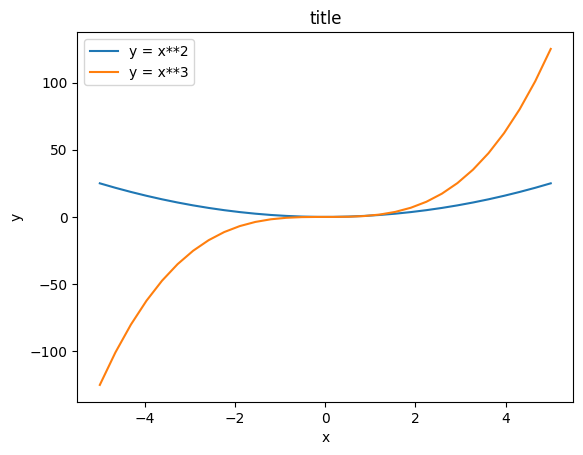

In [22]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
ax.legend(loc=2); # upper left corner

## Setting colors, linewidths, linetypes

### Colors

In matplotlib we can define the colors of lines and other graphical elements in a number of way. First of all, we can use the syntax where `'b'` means blue, `'g'` means green, etc. The non-OO API for selecting line styles are also supported: where for example 'b.-' mean a blue line with dots.

In [23]:
# style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

In matplotlib we can also define colors by their name or RGB hex codes, and optionally provide an alpha value, using the `color` and `alpha` keyword arguments:

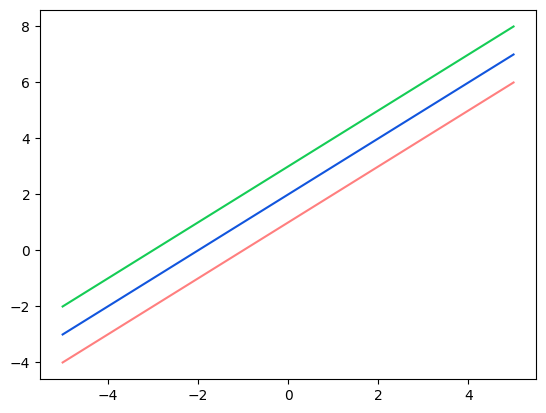

In [24]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

### Line and marker styles

To change the line width we can use the `linewidth` or `lw` keyword argument, and the line style can be selected using the `linestyle` or `ls` keyword arguments:

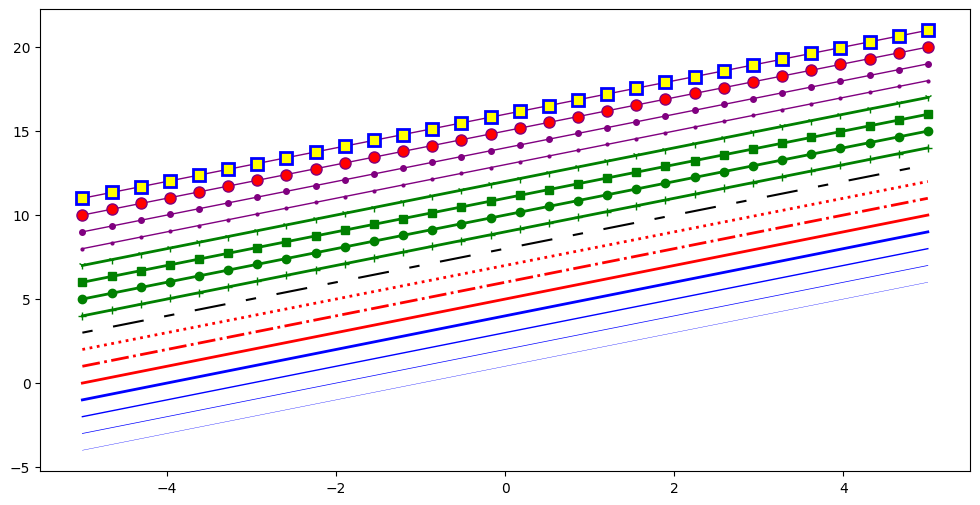

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='-', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='-', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='-', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='-', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Control over axis apperance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

### Plot range

The first thing we might want to configure is the ranges of the axes. We can do it using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges.

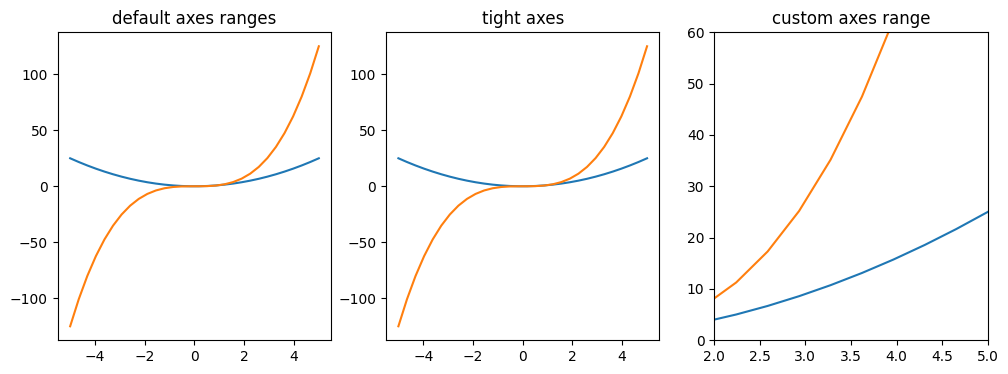

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks using the `set_xticks` and `set_yticks`, which both takes a list of values for where on the axis the ticks are to be placed. We can also use the functions `set_xticklabels` and `set_yticklabels` to provide a list of custom text labels for each tick location:

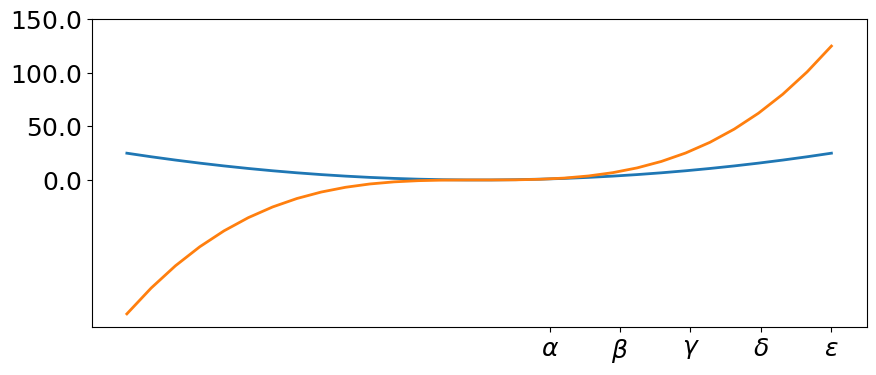

In [27]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

In matplotlib there is a number of more advanced methods for controlling major and minor tick placement, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

### Axis grid

Using the `grid` method in the axis object we can turn on and off grid lines. We can also customize the appearence of the gridlines, using the same keyword arguments as we previously used with the `plot` function.

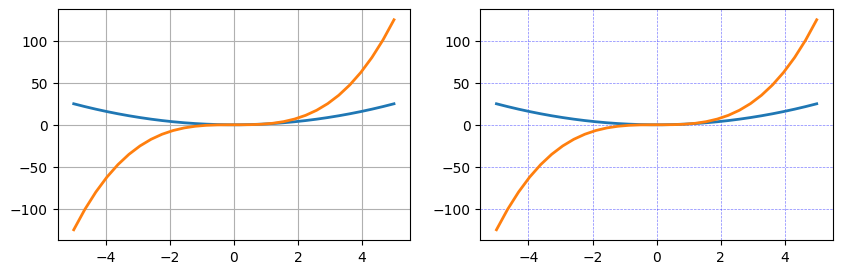

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axis spines

We can also change the properties of the axis spines:

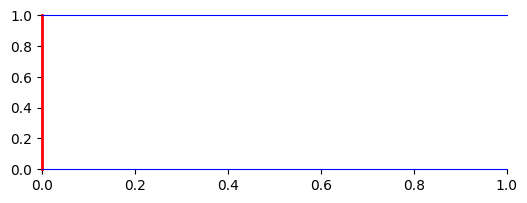

In [29]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure, for example when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

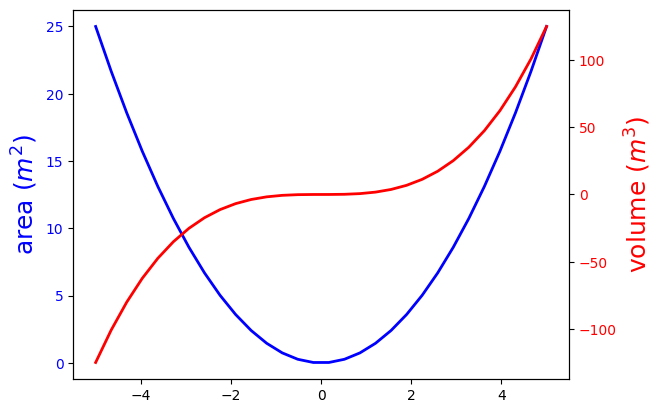

In [30]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y is zero  In 

Sometimes we need the spines to actually show up as the x and y axis on our plots.

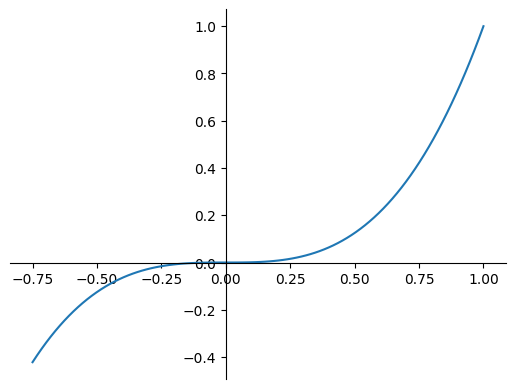

In [31]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

## Other 2D plot styles

In addition to the function `plot`, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of avaiable plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [32]:
n = array([0,1,2,3,4,5])

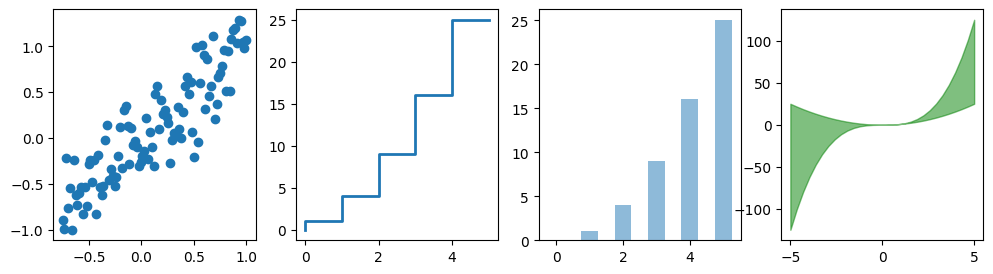

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*randn(len(xx)))

axes[1].step(n, n**2, lw=2)

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);

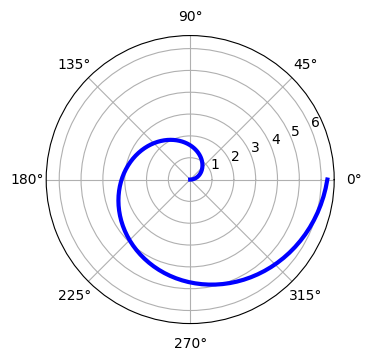

In [34]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = linspace(0, 2 * pi, 100)
ax.plot(t, t, color='blue', lw=3);

## Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

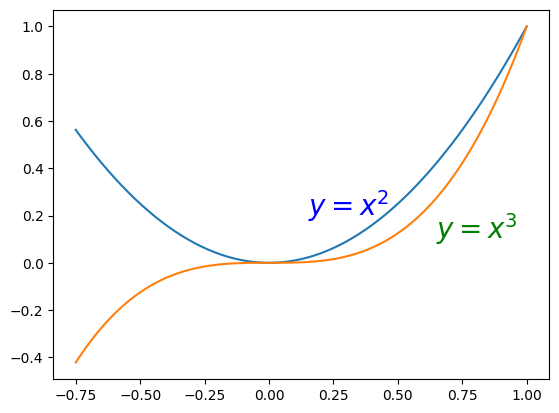

In [35]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery that showcase what kind of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.


Original versions of these notebooks created by J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/ and have been modified by Dr. Derek Riley